
# Your First Steps in Data Science with Python
A practical notebook to accompany the [blog post](https://are-dev.es/posts/datascience).  
Learn how to load, explore, clean, and visualize data using Pandas, Matplotlib, and Seaborn.


In [1]:
pip install pandas numpy matplotlib seaborn openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Load a Sample Dataset

In [3]:

data = sns.load_dataset("titanic")
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Exploring Data

In [4]:

data.info()
data.describe()
data.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

## Cleaning Data

In [5]:
# Fill missing 'age' values
data['age'] = data['age'].fillna(data['age'].median())

# Drop rows where 'embarked' is missing
data = data.dropna(subset=['embarked'])


## Visualizing Data

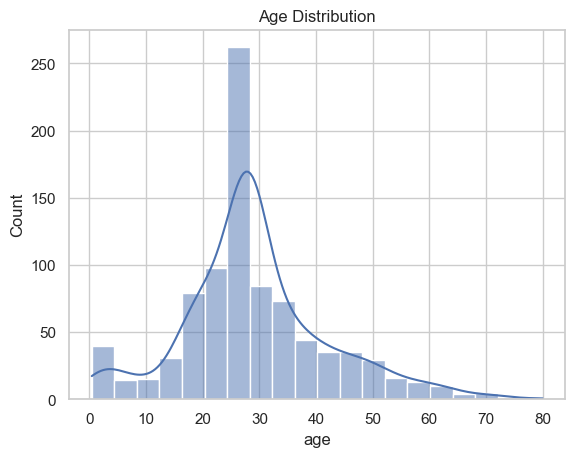

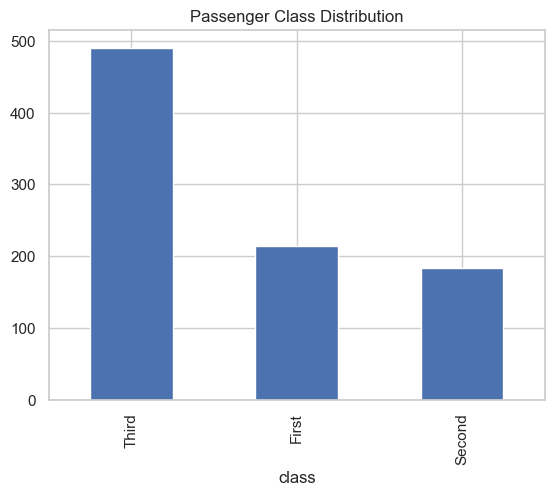

In [6]:

# Histogram
sns.histplot(data['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Bar chart
data['class'].value_counts().plot(kind='bar')
plt.title("Passenger Class Distribution")
plt.show()


## Simple Analysis

class
First     84.193516
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


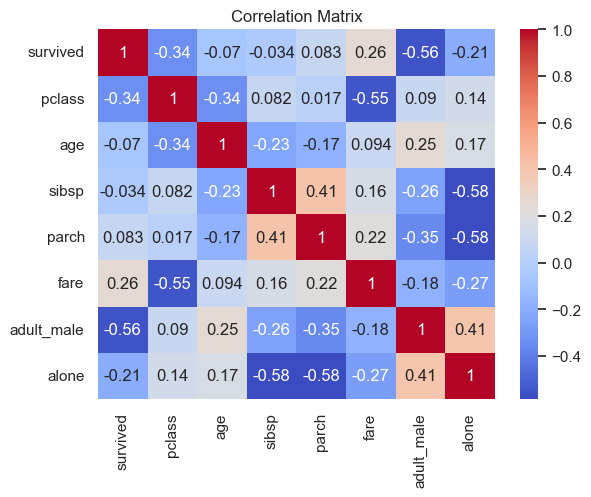

In [7]:

# Average fare by class
print(data.groupby('class', observed=False)['fare'].mean())

# Correlation heatmap
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Mini Project: Survival by Class & Gender

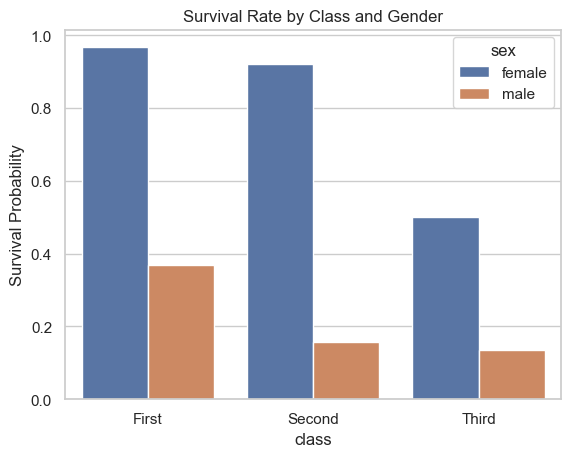

In [8]:
survival = data.groupby(['class', 'sex'], observed=False)['survived'].mean().reset_index()

sns.barplot(x='class', y='survived', hue='sex', data=survival)
plt.title("Survival Rate by Class and Gender")
plt.ylabel("Survival Probability")
plt.show()


## Export Results

In [9]:

data.to_csv("cleaned_titanic.csv", index=False)
survival.to_excel("titanic_summary.xlsx", index=False)



## Challenge
Try these small exercises:
1. What’s the average age of survivors?
2. Which port had the highest survival rate?
3. Create a histogram for `fare` values.
